In [1]:
!pip install pandas matplotlib scikit-learn

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 2: Load dataset
data = pd.read_csv("Salary Data.csv")

# Display first few rows
print(data.head())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [6]:
# Step 3: Define X (features) and y (target)
X = data[['Years of Experience']]
y = data['Salary']


In [8]:
# Step 4: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
# Check if any missing values exist
print(data.isnull().sum())


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [14]:
data = data.fillna(data.mean(numeric_only=True))

# Reset X and y again
X = data[['Years of Experience']]
y = data['Salary']

# Re-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
import pandas as pd

data = pd.read_csv("Salary Data.csv")

# Fill missing numeric values with mean, categorical with mode
for col in data.columns:
    if data[col].dtype == "object":  # categorical
        data[col] = data[col].fillna(data[col].mode()[0])
    else:  # numeric
        data[col] = data[col].fillna(data[col].mean())


In [18]:
data = pd.get_dummies(data, drop_first=True)


In [19]:
# Target column = Salary
y = data['Salary']

# Features = everything else except Salary
X = data.drop('Salary', axis=1)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 336851632.1001248
R² Score: 0.8609486071451853


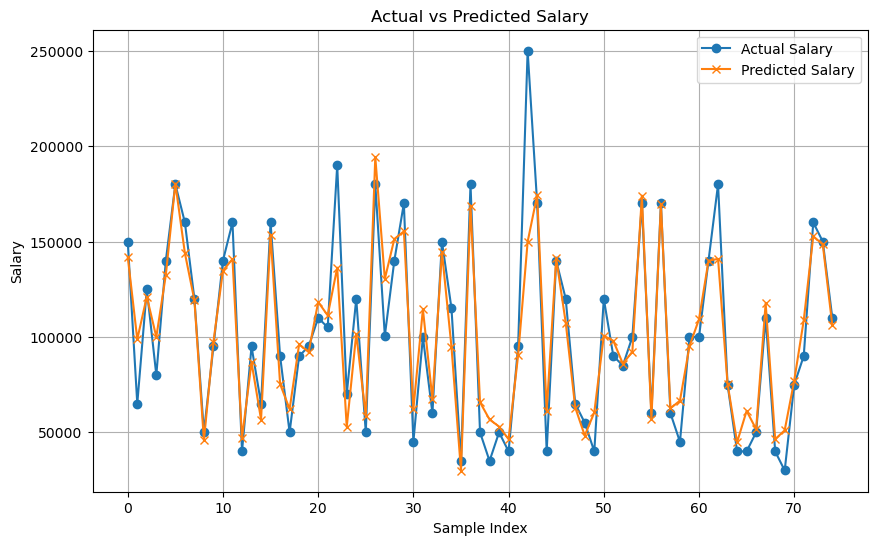

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Salary", marker='o')
plt.plot(y_pred, label="Predicted Salary", marker='x')
plt.title("Actual vs Predicted Salary")
plt.xlabel("Sample Index")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 86.09%
